In [23]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [24]:
path=r'C:\Users\KIIT\Desktop\ear\AWEDataset\awe'
os.chdir(path)
file_path=[]
for x in os.listdir(path):
    if os.path.isdir(x):
        data_path=os.path.join(path,x)
        file_path.append(data_path)
file_path

['C:\\Users\\KIIT\\Desktop\\ear\\AWEDataset\\awe\\001',
 'C:\\Users\\KIIT\\Desktop\\ear\\AWEDataset\\awe\\002',
 'C:\\Users\\KIIT\\Desktop\\ear\\AWEDataset\\awe\\003',
 'C:\\Users\\KIIT\\Desktop\\ear\\AWEDataset\\awe\\004',
 'C:\\Users\\KIIT\\Desktop\\ear\\AWEDataset\\awe\\005',
 'C:\\Users\\KIIT\\Desktop\\ear\\AWEDataset\\awe\\006',
 'C:\\Users\\KIIT\\Desktop\\ear\\AWEDataset\\awe\\007',
 'C:\\Users\\KIIT\\Desktop\\ear\\AWEDataset\\awe\\008',
 'C:\\Users\\KIIT\\Desktop\\ear\\AWEDataset\\awe\\009',
 'C:\\Users\\KIIT\\Desktop\\ear\\AWEDataset\\awe\\010',
 'C:\\Users\\KIIT\\Desktop\\ear\\AWEDataset\\awe\\011',
 'C:\\Users\\KIIT\\Desktop\\ear\\AWEDataset\\awe\\012',
 'C:\\Users\\KIIT\\Desktop\\ear\\AWEDataset\\awe\\013',
 'C:\\Users\\KIIT\\Desktop\\ear\\AWEDataset\\awe\\014',
 'C:\\Users\\KIIT\\Desktop\\ear\\AWEDataset\\awe\\015',
 'C:\\Users\\KIIT\\Desktop\\ear\\AWEDataset\\awe\\016',
 'C:\\Users\\KIIT\\Desktop\\ear\\AWEDataset\\awe\\017',
 'C:\\Users\\KIIT\\Desktop\\ear\\AWEDataset\\awe

In [25]:
for x in os.listdir(file_path[0]):
    if x.split('.')[-1] == 'png':
        print(x)

01.png
02.png
03.png
04.png
05.png
06.png
07.png
08.png
09.png
10.png


In [26]:
for i in range(len(file_path)):
    for x in os.listdir(file_path[i]):
        if x.split('.')[0] not in ['01','02','03','04','05','06','07','08','09','10']:
            os.remove(os.path.join(file_path[i],x))

In [27]:
for i in range(len(file_path[:-1])):
    for x in os.listdir(file_path[i]):
        if x.split('.')[-1] != 'png':
            os.remove(os.path.join(file_path[i],x))

In [28]:
for i in range(len(file_path[:-1])):
    print('Folder->',file_path[i].split('\\')[-1])
    print(f"Count->{len(os.listdir(file_path[i]))}",'\n')

Folder-> 001
Count->10 

Folder-> 002
Count->10 

Folder-> 003
Count->10 

Folder-> 004
Count->10 

Folder-> 005
Count->10 

Folder-> 006
Count->10 

Folder-> 007
Count->10 

Folder-> 008
Count->10 

Folder-> 009
Count->10 

Folder-> 010
Count->10 

Folder-> 011
Count->10 

Folder-> 012
Count->10 

Folder-> 013
Count->10 

Folder-> 014
Count->10 

Folder-> 015
Count->10 

Folder-> 016
Count->10 

Folder-> 017
Count->10 

Folder-> 018
Count->10 

Folder-> 019
Count->10 

Folder-> 020
Count->10 

Folder-> 021
Count->10 

Folder-> 022
Count->10 

Folder-> 023
Count->10 

Folder-> 024
Count->10 

Folder-> 025
Count->10 

Folder-> 026
Count->10 

Folder-> 027
Count->10 

Folder-> 028
Count->10 

Folder-> 029
Count->10 

Folder-> 030
Count->10 

Folder-> 031
Count->10 

Folder-> 032
Count->10 

Folder-> 033
Count->10 

Folder-> 034
Count->10 

Folder-> 035
Count->10 

Folder-> 036
Count->10 

Folder-> 037
Count->10 

Folder-> 038
Count->10 

Folder-> 039
Count->10 

Folder-> 040
Count->10 



In [29]:
os.path.exists(r'C:\Users\KIIT\Desktop\ear\AWEDataset\awe')

True

In [30]:
#Generator object
gen_6 = ImageDataGenerator(rotation_range=3,horizontal_flip=True,fill_mode='nearest') #generate images with 3 degree rotation
# gen_3 = ImageDataGenerator(rotation_range=6,horizontal_flip=True,fill_mode='nearest') #generate images with 6 degree rotation

for path in file_path:
   for img_file in os.listdir(path):
      if(img_file.split('.')[-1]=='png'):
        #join paths to get the path to images
        img_path=os.path.join(path,img_file) #full path to an image
        #Load and reshape the image
        img=load_img(img_path)
        x=img_to_array(img)
        x=x.reshape((1,)+x.shape)
        prefix=path.split('\\')[-1]
        i=1
        for batch in gen_6.flow(x,batch_size=1,save_to_dir=path,save_prefix=prefix,save_format='png'):
           i+=1
           if i>9: 
              break

In [31]:
import splitfolders
split_path=os.mkdir(r"C:/Users/KIIT/Desktop/ear/AWEDataset/awe/Split_Data") #creating a file to store the split folders
splitfolders.ratio(r"C:/Users/KIIT/Desktop/ear/AWEDataset/awe", output=r"C:/Users/KIIT/Desktop/ear/AWEDataset/awe/Split_Data",seed=7, ratio=(.7, .2, .1), group_prefix=None, move=False) # default values

Copying files: 9956 files [01:04, 153.29 files/s]


In [38]:
from tensorflow.keras import layers
from tensorflow.keras.applications import vgg19
from tensorflow.keras.applications.vgg19 import preprocess_input

In [41]:
train_path = r'C:/Users/KIIT/Desktop/ear/AWEDataset/awe/Split_Data/train'
valid_path = r'C:/Users/KIIT/Desktop/ear/AWEDataset/awe/Split_Data/val'
test_path = r'C:/Users/KIIT/Desktop/ear/AWEDataset/awe/Split_Data/test'

In [67]:
train_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
train_ds=train_gen.flow_from_directory(directory=train_path, target_size=(224,224),batch_size=32)

valid_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
valid_ds=valid_gen.flow_from_directory(directory=valid_path,target_size=(224,224),batch_size=32)

test_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
test_ds=test_gen.flow_from_directory(directory=test_path,target_size=(224,224),batch_size=32,shuffle=False)

Found 6956 images belonging to 100 classes.
Found 1964 images belonging to 100 classes.
Found 1036 images belonging to 100 classes.


In [68]:
imgs, labels = next(train_ds) #imgs is a numpy array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

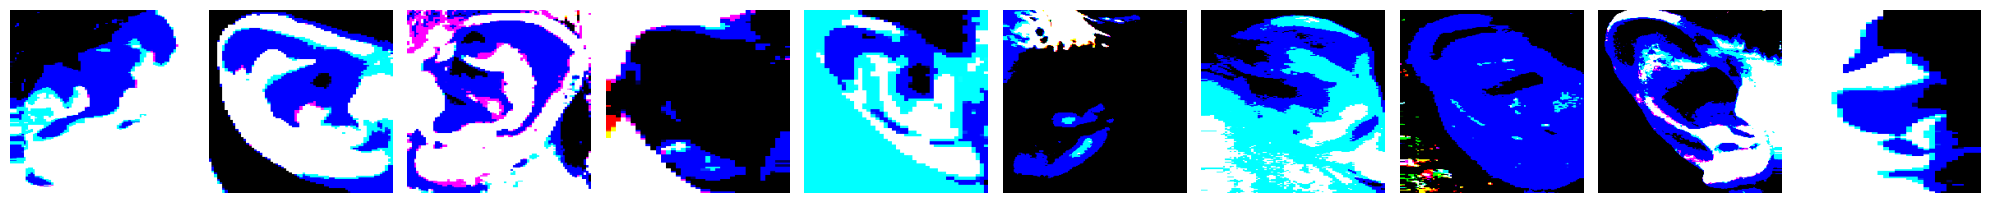

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [69]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

In [70]:
# ResNet50 model
vgg_19 = vgg19.VGG19(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in vgg_19.layers:
    layer.trainable = False

In [76]:
# build the entire model
x = vgg_19.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(100, activation='softmax')(x)
model_1 = Model(inputs = vgg_19.input, outputs = predictions)

In [77]:
from keras.utils import plot_model
# plot_model(model_1,show_trainable=True,show_layer_activations=True,show_dtype=True,show_shapes=True,show_layer_names=True,expand_nested=False)
model_1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [78]:
import tensorflow.keras
es=keras.callbacks.EarlyStopping(
    monitor="accuracy",
    patience=5,
    mode="max",
    restore_best_weights=False,
)

In [102]:
from keras.callbacks import ModelCheckpoint
model_1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint("vgg19.keras", monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='max')

In [80]:
history_1 = model_1.fit(train_ds,steps_per_epoch=len(train_ds),validation_data=valid_ds,validation_steps=len(valid_ds),epochs=25,verbose=1,callbacks=[es,checkpoint])

Epoch 1/25


218/218 [==============================] - 1171s 5s/step - loss: 4.7159 - accuracy: 0.0318 - val_loss: 4.1663 - val_accuracy: 0.1558
Epoch 2/25
218/218 [==============================] - 1166s 5s/step - loss: 3.9291 - accuracy: 0.1164 - val_loss: 3.1268 - val_accuracy: 0.3875
Epoch 3/25
218/218 [==============================] - 1166s 5s/step - loss: 3.1080 - accuracy: 0.2581 - val_loss: 2.0744 - val_accuracy: 0.6003
Epoch 4/25
218/218 [==============================] - 1161s 5s/step - loss: 2.4230 - accuracy: 0.3853 - val_loss: 1.4546 - val_accuracy: 0.7286
Epoch 5/25
218/218 [==============================] - 1159s 5s/step - loss: 1.9500 - accuracy: 0.4879 - val_loss: 1.0583 - val_accuracy: 0.7872
Epoch 6/25
218/218 [==============================] - 1163s 5s/step - loss: 1.5570 - accuracy: 0.5786 - val_loss: 0.7915 - val_accuracy: 0.8493
Epoch 7/25
218/218 [==============================] - 1162s 5s/step - loss: 1.3090 - accuracy: 0.6393 - val_loss: 0.5364 - val_accurac

In [98]:
model_1.save("C:/Users/KIIT/Desktop/CNN/EarDetection/VGG19", save_format='h5')

C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


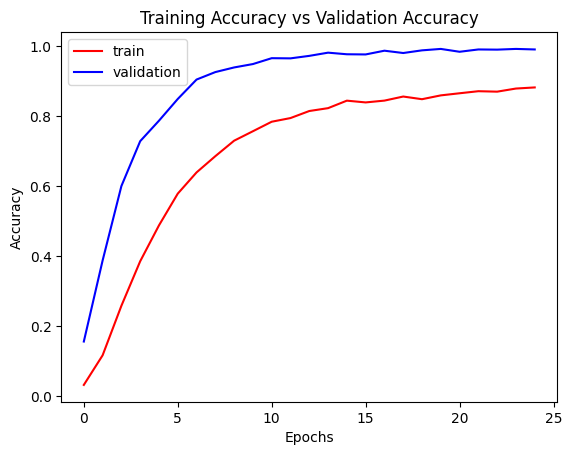

In [87]:
plt.plot(history_1.history['accuracy'],color='red',label='train')
plt.plot(history_1.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.show()

Text(0.5, 1.0, 'Training Loss vs Validation Loss')

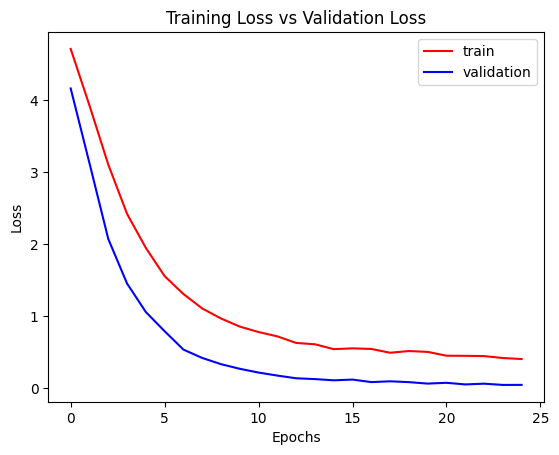

In [88]:
plt.plot(history_1.history['loss'],color='red',label='train')
plt.plot(history_1.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")

In [89]:
predictions = model_1.predict(x=test_ds, steps=len(test_ds), verbose=0)
for encoded_labels in np.round(predictions):
    print(np.argmax(encoded_labels))

0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
14
14
6
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
16
16
16
16
0
16
16
16
16
16
17
17
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
22
22
22
22
22
22
22
22
22
22
23
23
23
23
23
23
23
23
23
23
24
24
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
25
25
26
26
26
26
26
26
26
26
26
26
27
27
27
27
27
27
27
27
27
27
28
28
28
28
28
28
28
28
28
28
29
29
29
29
29
29
0
29
29
29
30
30
30
30
30
30
30
30
30
30
31
31
31
31
31
31
31
31
31
31
31
32
32
32
32
32
32
32
32
32
32
32
33
33
33
33
33
33
33
33
33
33
34
34
34
34
34
34
34
34
34
34
34
35
35
35
35
35
35
3

In [90]:
for encoded_labels in np.round(predictions):
    print(np.argmax(encoded_labels))

0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
14
14
6
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
16
16
16
16
0
16
16
16
16
16
17
17
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
22
22
22
22
22
22
22
22
22
22
23
23
23
23
23
23
23
23
23
23
24
24
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
25
25
26
26
26
26
26
26
26
26
26
26
27
27
27
27
27
27
27
27
27
27
28
28
28
28
28
28
28
28
28
28
29
29
29
29
29
29
0
29
29
29
30
30
30
30
30
30
30
30
30
30
31
31
31
31
31
31
31
31
31
31
31
32
32
32
32
32
32
32
32
32
32
32
33
33
33
33
33
33
33
33
33
33
34
34
34
34
34
34
34
34
34
34
34
35
35
35
35
35
35
3

In [91]:
train_loss,train_acc=model_1.evaluate(train_ds)
test_loss,test_acc=model_1.evaluate(test_ds)
print(f"Train Loss:{train_loss*100}\tTrain Accuracy={train_acc*100}\nTest Loss={test_loss*100}\tTest Accuracy={test_acc*100}")

33/33 [==============================] - 140s 4s/step - loss: 0.0341 - accuracy: 0.9923
Train Loss:0.7541400846093893	Train Accuracy=99.9424934387207
Test Loss=3.4086309373378754	Test Accuracy=99.2277979850769


In [99]:
from tensorflow import keras
from keras.models import load_model

In [103]:
new_model=load_model("VGG19.keras")
history_new = new_model.fit(train_ds,steps_per_epoch=len(train_ds),validation_data=valid_ds,validation_steps=len(valid_ds),epochs=25,verbose=1,callbacks=[es,checkpoint])

Epoch 1/25
218/218 [==============================] - 1202s 6s/step - loss: 0.4129 - accuracy: 0.8820 - val_loss: 0.0391 - val_accuracy: 0.9934
Epoch 2/25
218/218 [==============================] - 1199s 6s/step - loss: 0.4064 - accuracy: 0.8851 - val_loss: 0.0419 - val_accuracy: 0.9919
Epoch 3/25
218/218 [==============================] - 1201s 6s/step - loss: 0.3954 - accuracy: 0.8870 - val_loss: 0.0376 - val_accuracy: 0.9929
Epoch 4/25
218/218 [==============================] - 1205s 6s/step - loss: 0.3940 - accuracy: 0.8854 - val_loss: 0.0369 - val_accuracy: 0.9939
Epoch 5/25
218/218 [==============================] - 1210s 6s/step - loss: 0.3740 - accuracy: 0.8916 - val_loss: 0.0344 - val_accuracy: 0.9939
Epoch 6/25
218/218 [==============================] - 1218s 6s/step - loss: 0.3900 - accuracy: 0.8894 - val_loss: 0.0355 - val_accuracy: 0.9969
Epoch 7/25
218/218 [==============================] - 1227s 6s/step - loss: 0.3365 - accuracy: 0.9032 - val_loss: 0.0369 - val_accuracy:

In [106]:
model_1.save(r"C:\Users\KIIT\Desktop\CNN\EarDetection\vgg19new.keras")

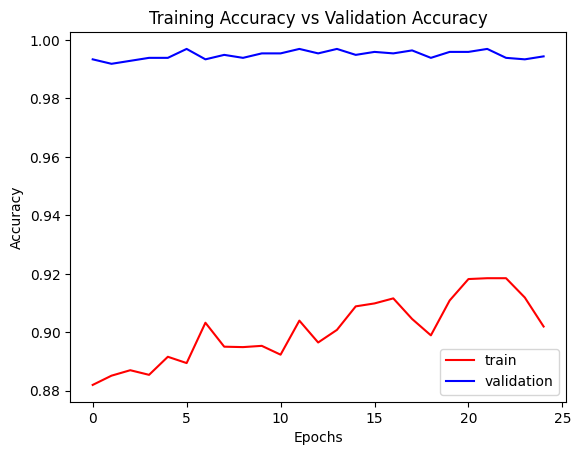

In [107]:
plt.plot(history_new.history['accuracy'],color='red',label='train')
plt.plot(history_new.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.show()

Text(0.5, 1.0, 'Training Loss vs Validation Loss')

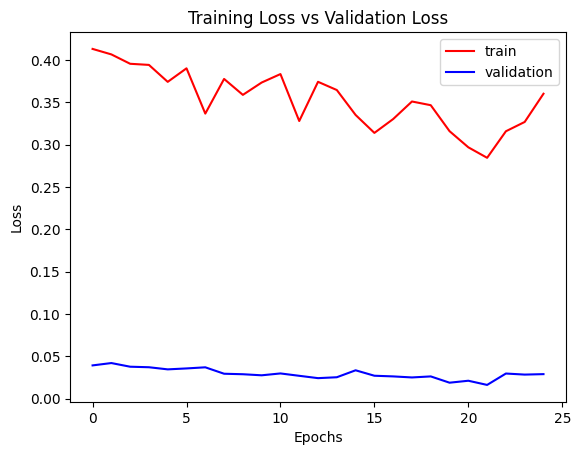

In [108]:
plt.plot(history_new.history['loss'],color='red',label='train')
plt.plot(history_new.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")

In [109]:
predictions = model_1.predict(x=test_ds, steps=len(test_ds), verbose=0)
for encoded_labels in np.round(predictions):
    print(np.argmax(encoded_labels))

0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
14
14
6
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
16
16
16
16
0
16
16
16
16
16
17
17
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
22
22
22
22
22
22
22
22
22
22
23
23
23
23
23
23
23
23
23
23
24
24
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
25
25
26
26
26
26
26
26
26
26
26
26
27
27
27
27
27
27
27
27
27
27
28
28
28
28
28
28
28
28
28
28
29
29
29
29
29
29
0
29
29
29
30
30
30
30
30
30
30
30
30
30
31
31
31
31
31
31
31
31
31
31
31
32
32
32
32
32
32
32
32
32
32
32
33
33
33
33
33
33
33
33
33
33
34
34
34
34
34
34
34
34
34
34
34
35
35
35
35
35
35
3

In [110]:
for encoded_labels in np.round(predictions):
    print(np.argmax(encoded_labels))

0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
14
14
6
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
16
16
16
16
0
16
16
16
16
16
17
17
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
22
22
22
22
22
22
22
22
22
22
23
23
23
23
23
23
23
23
23
23
24
24
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
25
25
26
26
26
26
26
26
26
26
26
26
27
27
27
27
27
27
27
27
27
27
28
28
28
28
28
28
28
28
28
28
29
29
29
29
29
29
0
29
29
29
30
30
30
30
30
30
30
30
30
30
31
31
31
31
31
31
31
31
31
31
31
32
32
32
32
32
32
32
32
32
32
32
33
33
33
33
33
33
33
33
33
33
34
34
34
34
34
34
34
34
34
34
34
35
35
35
35
35
35
3

In [111]:
train_loss,train_acc=model_1.evaluate(train_ds)
test_loss,test_acc=model_1.evaluate(test_ds)
print(f"Train Loss:{train_loss*100}\tTrain Accuracy={train_acc*100}\nTest Loss={test_loss*100}\tTest Accuracy={test_acc*100}")

33/33 [==============================] - 142s 4s/step - loss: 0.0341 - accuracy: 0.9923
Train Loss:0.7541400846093893	Train Accuracy=99.9424934387207
Test Loss=3.4086309373378754	Test Accuracy=99.2277979850769
